In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [61]:
df = pd.read_csv('inflearn-event.csv')

In [62]:
df.head()

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [63]:
# drop_diplicates는 중복을 제거하고  마지막글을 남긴다.
print(df.shape)
df = df.drop_duplicates(['text'], keep='last')
print(df.shape)

(2449, 1)
(2411, 1)


In [64]:
df['orgin_text'] = df['text']

In [65]:
df.head()

,text,orgin_text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!


In [66]:
df['text'] = df['text'].str.lower()

In [67]:
df.head()

,text,orgin_text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!


In [68]:
df['text'] = df['text'].str.replace(
    'python', '파이썬').str.replace(
    'pandas', '판다스').str.replace(
    'javascript', '자바스크립트').str.replace(
    'java', '자바').str.replace(
    'react', '리액트')

In [69]:
df.head()

,text,orgin_text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!


In [70]:
df['course'] = df['text'].apply(lambda x:x.split('관심강의')[-1])
df['course'] = df['course'].apply(lambda x:x.split('관심 강의')[-1])
df['course'] = df['course'].apply(lambda x:x.split('관심 강좌')[-1])
df['course'] = df['course'].str.replace(':', '')
df.head()

,text,orgin_text,course
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!


In [71]:
df[['text', 'course']].head()

,text,course
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!


In [72]:
search_keyword = ['머신러닝', '딥러닝', '파이썬', '판다스', '공공데이터',
                  'django', '크롤링', '시각화', '데이터분석', 
                  '웹개발', '엑셀', 'c', '자바', '자바스크립트', 
                  'node', 'vue', '리액트']

In [73]:
for keyword in search_keyword:
    df[keyword] = df["course"].str.contains(keyword)

In [74]:
df.head(1)

,text,orgin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [75]:
df_python = df[df['text'].str.contains('파이썬|공공데이터|판다스')].copy()
df_python.shape

(430, 20)

In [76]:
df[search_keyword].sum().sort_values(ascending=False)

c         410
파이썬       406
자바        341
자바스크립트    140
리액트       137
머신러닝      133
vue       132
node      117
크롤링        56
딥러닝        53
django     31
시각화        30
웹개발        27
데이터분석      24
엑셀         18
공공데이터      12
판다스         6
dtype: int64

In [77]:
df.head(1)

,text,orgin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [78]:
t = df.loc[df['판다스']== True, 'text' ]

for num, t in enumerate(t):
    print('_'*50)
    print(t)

__________________________________________________
2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!
#관심강의 : 파이썬, 판다스, 데이터분석, 머신러닝
__________________________________________________
취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로이드 기반언어로 바뀌어서 새로 배워보려고 합니다.
관심강의 : kotlin, 판다스, 파이썬, c언어
__________________________________________________
판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : 박조은 - 판다스
__________________________________________________
2020년!! 올 해는 빅데이터 분석 전문가 되기!!
#관심강의 : 파이썬, 판다스
__________________________________________________
2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관심강의:파이썬 판다스 관련 강좌 입니다
__________________________________________________
저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로 커리어 전환을 준비하고 있습니다. 인프런의 수많은 좋은 강의중 파이썬 기반의 데이터분석을 공부하기 위하여 인프런을 활용하고 있습니다. 대한민국 최고의 데이터분석가 되는 그날까지 인프런과 함께 하겟습니다.
#관심강의 : 파이썬 판다스 데이터 분석과 시각화 뽀개기등 데이터분석 관련 강의


In [56]:
text.reset_index()

,index,text
0,541,"2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다..."
1,690,"취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로..."
2,758,판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : 박조은 - 판다스
3,1237,"2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스"
4,2155,2020년 목표 파이썬 을 활용해 데이터 분석 작업을 진행하고 싶습니다. 관...
5,2365,저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...


In [79]:
df.loc[df['판다스']== True, 'text']

541     2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다...
690     취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로...
758          판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : 박조은 - 판다스
1237      2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
2155    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
2365    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

In [80]:
'파이썬 데이터 분석'.split()

['파이썬', '데이터', '분석']

In [87]:
df.head(1)

,text,orgin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer= None,
                            preprocessor= None,
                            stop_words= None,
                            min_df= 2,
                            ngram_range=(3,6),
                            max_features= 2000
                            )

In [89]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector

<2411x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 11561 stored elements in Compressed Sparse Row format>

In [91]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2000


['12개 만들면서 배우는',
 '12개 만들면서 배우는 ios',
 '12개 만들면서 배우는 ios 아이폰',
 '12개 만들면서 배우는 ios 아이폰 개발',
 '12개를 만들며 배우는',
 '12개를 만들며 배우는 swift4',
 '12개를 만들며 배우는 swift4 ios11',
 '12개를 만들며 배우는 swift4 ios11 아이폰',
 '2018 do it',
 '2018 do it 안드로이드']

In [92]:
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
dist = np.sum(feature_vector, axis=0)

df_freq= pd.DataFrame(dist, columns=vocab)
df_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,2,2,2,2,2,2,2,2,2,2,...,16,13,13,12,2,8,8,2,2,2


In [97]:
df_freq.T.sort_values(by=0, ascending=False).head(30)

,0
홍정모의 따라하며 배우는,100
스프링 데이터 jpa,60
nodebird sns 만들기,60
파이썬 머신러닝 완벽,49
리액트로 nodebird sns,49
머신러닝 완벽 가이드,49
리액트로 nodebird sns 만들기,49
파이썬 머신러닝 완벽 가이드,48
프로그래밍과 자바스크립트 es6,48
함수형 프로그래밍과 자바스크립트 es6,47


In [100]:
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ['course', 'freq']
df_freq_T.head()

,course,freq
0,12개 만들면서 배우는,2
1,12개 만들면서 배우는 ios,2
2,12개 만들면서 배우는 ios 아이폰,2
3,12개 만들면서 배우는 ios 아이폰 개발,2
4,12개를 만들며 배우는,2


In [102]:
# 강의명을 토큰 3개로 중복제거하기 위해, 강좌명에서 지식공유자의 이름을 빈문자열로 변경합니다.
# 강의명을 lambda 식을 사용해서 x.split() 으로 나누고 [:4] 앞에서 4개까지만 텍스트를 가져오고 다시 join으로 합쳐줍니다. 
# 중복된 텍스트를 구분해서 보기 위함입니다.
df_freq_T["course_find"] = df_freq_T["course"].str.replace("홍정모의", "")
df_freq_T["course_find"] = df_freq_T["course_find"].apply(lambda x : " ". join(x.split()[:4]))
df_freq_T.sort_values(["course_find", "freq"], ascending=False).head(10)

,course,freq,course_find
1999,활용한 파이썬 프로그래밍,2,활용한 파이썬 프로그래밍
1998,활용한 메신져 만들기 android,2,활용한 메신져 만들기 android
1997,활용한 메신져 만들기,2,활용한 메신져 만들기
1996,활용한 리액트 native 개발,8,활용한 리액트 native 개발
1995,활용한 리액트 native,8,활용한 리액트 native
1994,활용한 데이터분석과 it보안,2,활용한 데이터분석과 it보안
1992,활용한 다양한 자동화 어플리케이션,13,활용한 다양한 자동화 어플리케이션
1993,활용한 다양한 자동화 어플리케이션 제작하기,12,활용한 다양한 자동화 어플리케이션
1991,활용한 다양한 자동화,13,활용한 다양한 자동화
1989,활용2 api 개발과 성능,16,활용2 api 개발과 성능


In [106]:
df_course = df_freq_T.drop_duplicates(["course_find", "freq"], keep="first")

In [108]:
df_course = df_course.sort_values(by='freq', ascending=False)
df_course.head(20)

,course,freq,course_find
1965,홍정모의 따라하며 배우는,100,따라하며 배우는
1083,스프링 데이터 jpa,60,스프링 데이터 jpa
324,nodebird sns 만들기,60,nodebird sns 만들기
912,리액트로 nodebird sns 만들기,49,리액트로 nodebird sns 만들기
1737,파이썬 머신러닝 완벽,49,파이썬 머신러닝 완벽
911,리액트로 nodebird sns,49,리액트로 nodebird sns
933,머신러닝 완벽 가이드,49,머신러닝 완벽 가이드
1738,파이썬 머신러닝 완벽 가이드,48,파이썬 머신러닝 완벽 가이드
1868,프로그래밍과 자바스크립트 es6,48,프로그래밍과 자바스크립트 es6
1918,함수형 프로그래밍과 자바스크립트 es6,47,함수형 프로그래밍과 자바스크립트 es6


In [109]:
from sklearn.feature_extraction.text import TfidfTransformer

In [111]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [112]:
# fit_transform 으로 가중치를 적용하고 결과를 feature_tfidf 로 받습니다.
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

(2411, 2000)

In [113]:
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.235027,0.235027,0.23805,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by= 0, ascending=False)
df_tfidf_top

,0
홍정모의 따라하며 배우는,66.601666
스프링 데이터 jpa,35.647452
nodebird sns 만들기,26.975433
파이썬 머신러닝 완벽,24.812491
머신러닝 완벽 가이드,24.564762
...,...
강좌 tdd 개발 방법론을 활용한 리액트,0.180154
구사하는 기술 보유하여,0.180154
강좌 tdd 개발 방법론을 활용한,0.180154
구사하는 기술 보유하여 스스로의,0.180154


In [118]:
for t in df_tfidf_top.index[:30]:
    print(t)

홍정모의 따라하며 배우는
스프링 데이터 jpa
nodebird sns 만들기
파이썬 머신러닝 완벽
머신러닝 완벽 가이드
리액트로 nodebird sns
리액트로 nodebird sns 만들기
파이썬 머신러닝 완벽 가이드
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
함수형 프로그래밍과 자바스크립트 es6
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
2020년 공부 목표
실전 스프링 데이터
실전 스프링 데이터 jpa
파이썬 실전 100
파이썬 실전 100 활용
남박사의 파이썬 실전
남박사의 파이썬 실전 100
실전 100 활용
남박사의 파이썬 실전 100 활용
관심있는 인프런 강의명
파이썬 머신러닝 완벽가이드
따라하며 배우는 c언어
홍정모의 따라하며 배우는 c언어
rest api 개발
대세는 쿠버네티스 기초편
스프링부트 개념과 활용


In [121]:
feature_tfidf

<2411x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11561 stored elements in Compressed Sparse Row format>

In [124]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 30
end = 70

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
# trange 를 통해 시작과 끝 값을 지정해 주면 진행 정도를 알 수 있습니다.
# 학습을 할 때는 feature_tfidf 값을 사용합니다.
# cls.inertia_ 값을 inertia 리스트에 저장합니다.
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:14<00:00,  1.85s/it]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

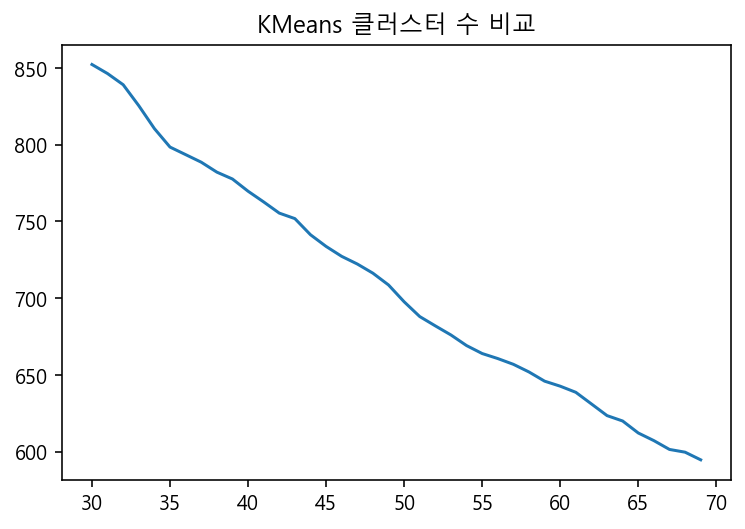

In [128]:
plt.plot(range(start, end), inertia)
plt.title("KMeans 클러스터 수 비교")

In [129]:
df

,text,orgin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 jpa 강의를 또 스...","작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스...",스프링 데이터 jpa,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2445,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,스프링 부트 개념과 활용,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2446,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...","에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...",에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2447,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [131]:
# n_clusters 에 적절한 값을 넣어줍니다.
# fit.predict 를 하고 결과를 cluster 라는 새로운 컬럼에 담습니다.
n_clusters = 50
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["cluster"] = prediction

In [134]:
df['cluster'].value_counts().head(10)

1     1663
5       54
4       43
10      42
3       37
7       32
0       29
2       28
31      28
27      25
Name: cluster, dtype: int64

In [139]:
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    b_inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:11<00:00,  3.34it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

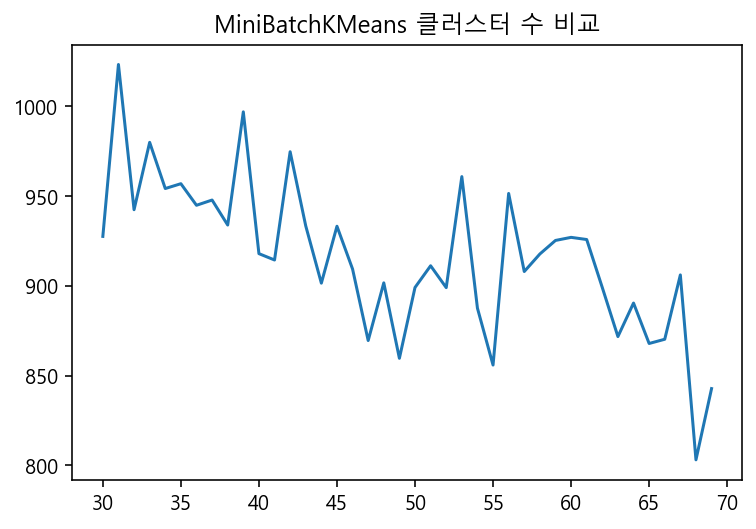

In [140]:
plt.plot(range(start, end), b_inertia)
plt.title('MiniBatchKMeans 클러스터 수 비교')

In [141]:
feature_tfidf

<2411x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11561 stored elements in Compressed Sparse Row format>

In [143]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["bcluster"] = prediction

In [147]:
df['bcluster'].value_counts().head(10)

45    1123
1      401
24      69
23      54
25      47
5       42
32      42
38      41
12      36
18      35
Name: bcluster, dtype: int64

In [153]:
df.loc[df['bcluster']==21, 'course'].value_counts().head(1)

  자바스크립트로 알아보는 함수형 프로그래밍    2
Name: course, dtype: int64

In [154]:
df.loc[df['bcluster']==21, ["bcluster", "cluster", "course"]]

,bcluster,cluster,course
432,21,1,자바스크립트로 알아보는 함수형 프로그래밍
468,21,1,; 자바스크립트로 알아보는 함수형 프로그래밍
973,21,1,자바스크립트로 알아보는 함수형 프로그래밍


In [162]:
df.loc[df["bcluster"] == 24].head(1)

,text,orgin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,...,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트,cluster,bcluster
31,이번에 새로 vue 관련 기술을 이용하는 프로젝트에 착수하게 되었습니다.\nvue를...,이번에 새로 vue 관련 기술을 이용하는 프로젝트에 착수하게 되었습니다.\nvue를...,이번에 새로 vue 관련 기술을 이용하는 프로젝트에 착수하게 되었습니다.\nvue를...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,21,24


In [167]:
df.loc[df['bcluster']==24, ['bcluster', 'cluster', 'orgin_text', 'course']].tail(10)

,bcluster,cluster,orgin_text,course
2073,24,1,대학을 와서 약 4년넘게 프로젝트를 제대로 해본적이 없는데 \n올해의 꼭 저만의 웹...,"r로 하는 웹 크롤링 - 실전편,r로 하는 웹 크롤링 - 입문편, 스프링 부트 개념..."
2139,24,1,2020년 목표: 조금 더 노력해서 하드한 ios 개발자 되기. 제발!!!\n관심 ...,ios 개발을 위한 swift5 완벽 가이드
2187,24,1,Vue.js 잘 배워서 프로젝트 마무리하고 풀스택 개발자가 되어 올해에는 꼭 취뽀하...,vue.js 중급 강좌
2196,24,21,javascript 프레임워크 공부 하고 싶어요! \n#관심강의 : Vue.js 시...,vue.js 시작하기 - age of vue.js
2264,24,41,"4년차 개발자 입니다. fullStack 개발에 관심있어\n시간내서 ""내 손으로 ...",내 손으로 만드는 django 2.x 인스타그램 클론 강의
2266,24,41,프론트앱과 백엔드를 같이 공부하고싶은 고등학생입니다 새해다짐으로 1개월만에 웹서비스...,"내 손으로 만드는 django 2.x 인스타그램 클론 강의,코알못에서 웹서비스 런칭..."
2385,24,21,프론트엔드 개발자로 취업 뽀개기! 취업뿌셔!\n# 관심강의: Vue.js 시작하기 ...,vue.js 시작하기 - age of vue.js
2398,24,1,2020년 공부목표:\n컴퓨터 공학을 전공하지 않았지만 소프트웨어 개발자로 일하고 ...,2020년 공부목표\n컴퓨터 공학을 전공하지 않았지만 소프트웨어 개발자로 일하고 있...
2419,24,1,2020년 공부목표: \n학교를 졸업한지 벌써 3년입니다. 졸업 할 때 만해도 무엇...,2020년 공부목표 \n학교를 졸업한지 벌써 3년입니다. 졸업 할 때 만해도 무엇이...
2427,24,40,"마음으로는 모든 강의가 듣고싶지만, 한가지씩 해나가고싶습니다. 우선은 파이썬부터 시...",파이썬 사용자를 위한 웹개발 입문 a to z django + bootstrap


In [173]:
# n_clusters 위에서 정의한 클러스터 수를 사용
feature_array = feature_vector.toarray()
# 예측한 클러스터의 유니크 값
labels = np.unique(prediction)
df_cluster_score = []
df_cluster = []
for label in labels:
    id_temp = np.where(prediction==label) # 예측한 값이 클러스터 번호와 매치 되는 것을 가져옴
    x_means = np.mean(feature_array[id_temp], axis = 0) # 클러스터의 평균 값을 구함
    sorted_means = np.argsort(x_means)[::-1][:n_clusters] # 값을 역순으로 정렬해서 클러스터 수 만큼 가져옴
    features = vectorizer.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means] 
    # 클러스터별 전체 스코어
    df_score = pd.DataFrame(best_features, columns = ['features', 'score'])
    df_cluster_score.append(df_score)
    # 클러스터 대표 키워드
    df_cluster.append(best_features[0])

In [174]:
# 개별 클러스터에서 점수가 가장 높은 단어를 추출 아래 점수가 클수록 예측 정확도가 높음
# MiniBatchKMeans 로 예측한 값 기준
pd.DataFrame(df_cluster, 
             columns = ['features', 'score']).sort_values(by=["features", "score"], ascending=False)

,features,score
16,홍정모의 따라하며 배우는 c언어,1.000000
23,홍정모의 따라하며 배우는,1.000000
33,홍정모의 따라하며 배우는,1.000000
1,프로그래밍과 자바스크립트 es6,0.109726
32,프로그래밍 입문 강좌 renew ver 초보부터,1.000000
25,프로그래밍 시작하기 파이썬 입문,0.382979
13,파이썬 입문 크롤링을 활용한 다양한,0.419355
3,파이썬 머신러닝 완벽,1.000000
11,취업을 위해 제대로,0.333333
36,초심자를 위한 리액트,1.000000


In [177]:
# score 정확도가 1이 나온 클러스터를 찾아봄 - 같은 강좌끼리 묶였는지 확인 함
df.loc[df["bcluster"] == 28, ["bcluster", "cluster", "origin_text", "course"]]

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [180]:
# 불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트
# stopwords = ["관심 강의", "관심강의", "관심", "강의", "강좌", "강의를",
#              "올해", "올해는", "열심히", "공부를", "합니다", "하고", "싶어요", 
#              "있는", "있습니다", "싶습니다", "2020년"]
# 불용어를 제거하지 않고 그리려면 아래 주석을 풀어서 stopword 변수에 덮어쓰기를 합니다.
stopwords = []
# displayWordCloud 라는 함수를 만들어 재사용합니다.
from wordcloud import WordCloud


def displayWordCloud(data = None, backgroundcolor = 'black', width=1280, height=768):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = stopwords, 
                        background_color = backgroundcolor, 
                        width = width, height = height, 
                        random_state=42).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [183]:
course_text = " ".join(df["course"])
displayWordCloud(course_text)

OSError: cannot open resource